Для начала подключим библиотеки, которые нам понадобятся.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv'  , sep=',')
# Посмотрим первые 10 записей из набора данных
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


В  этом dataset'е представлена информация о выживших и погибших пассажирах Титаника:

PassengerId - Номер пассажира согласно списку;
Survived - Удалось ли данному пассажиру выжить;
Pclass - Класс, которым следовал пассажир;
Name - Имя пассажира;
Sex - Пол пассажира;
Age - Возраст пассажира;
SibSp - Число братьев, сестер и супругов на борту;
Parch - Количество родителей и детей на борту;
Ticket - Билет пассажира ;
Fare - Стоимость тарифа ;
Cabin - Размещение пассажира на борту;
Embarked - Посадка пассажира;

Будем предсказывать значение переменной Survived, которая означает, выжил ли данный пассажир. Эта задача - задача бинарной классификации.

В нашей выборке есть признаки "PassengerId","Name", "Ticket". Очевидно, они нам не понадобятся. Выбросим их из выборки.

In [4]:
data = data.drop(['PassengerId','Name','Ticket'], axis='columns') # первый аргумент - список ненужных признаков,
                                                   # второй - поиск имен признаков по названиям колонок, а не строк

Посмотрим таблицу и убедимся, что ненужные нам колонки убрались

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Посмотрим, можем ли мы выбросить еще какие-нибудь признаки из нашей таблицы. Это стоит делать, поскольку чем меньше признаков - тем легче вычислять расстояние между объектами, то есть алгоритм будет работать быстрее. Посмотрим на корреляцию признаков между собой. Построим графическое представление модуля значения корреляции попарно между признаками.

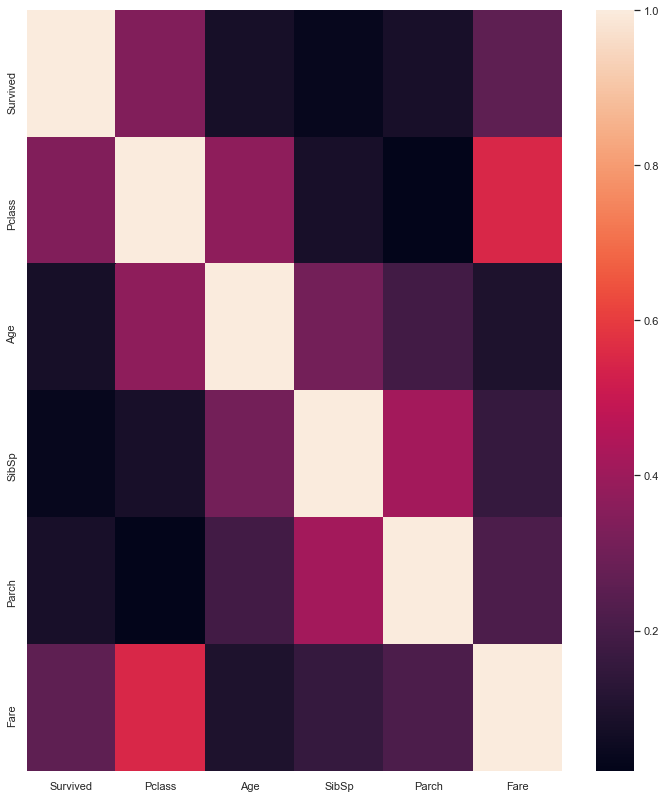

In [6]:
# Картинку отрисуем с помощью библиотеки seaborn
import seaborn as sns
# Подсчитаем корреляцию и возьмем модуль от нее
corr = data.corr().abs()
# Следующая команда устанавливает размер картинки (по умолчанию она довольно маленькая)
sns.set(rc={'figure.figsize':(12, 14)})
# Нарисуем картинку
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Другой варинат представления корреляции

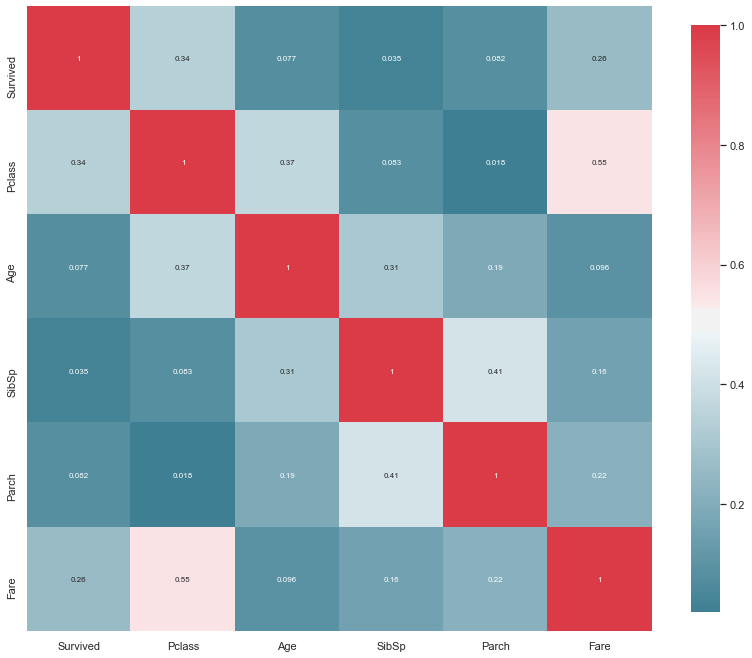

In [7]:
import seaborn as sns
def plot_correlation_map(data):
    corr=data.corr().abs()
    _ , ax=plt.subplots(figsize=(14,12))
    cmap=sns.diverging_palette(220,10,as_cmap=True)
    _=sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink':.9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize':8}
    )
plot_correlation_map(data)

Удалим из выборки признаки, высоко коррелирующие с другими признаками


In [8]:
data = data.drop(['Fare'], axis='columns')

Посмотрим какие признаки остались

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


Посмотрим их корреляцию как вышеприведенная картинка (аналогично)

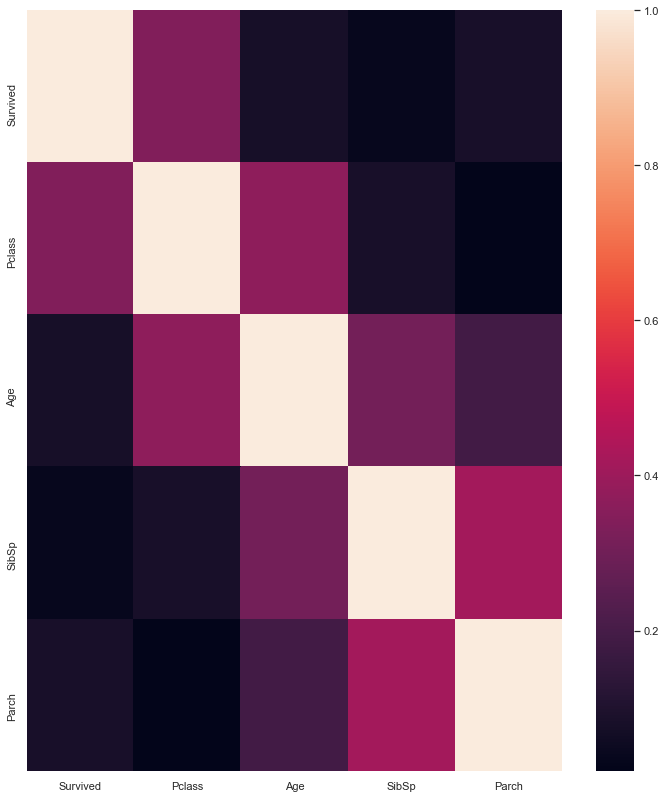

In [10]:
# Картинку отрисуем с помощью библиотеки seaborn
import seaborn as sns
# Подсчитаем корреляцию и возьмем модуль от нее
corr = data.corr().abs()
# Следующая команда устанавливает размер картинки (по умолчанию она довольно маленькая)
sns.set(rc={'figure.figsize':(12, 14)})
# Нарисуем картинку
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

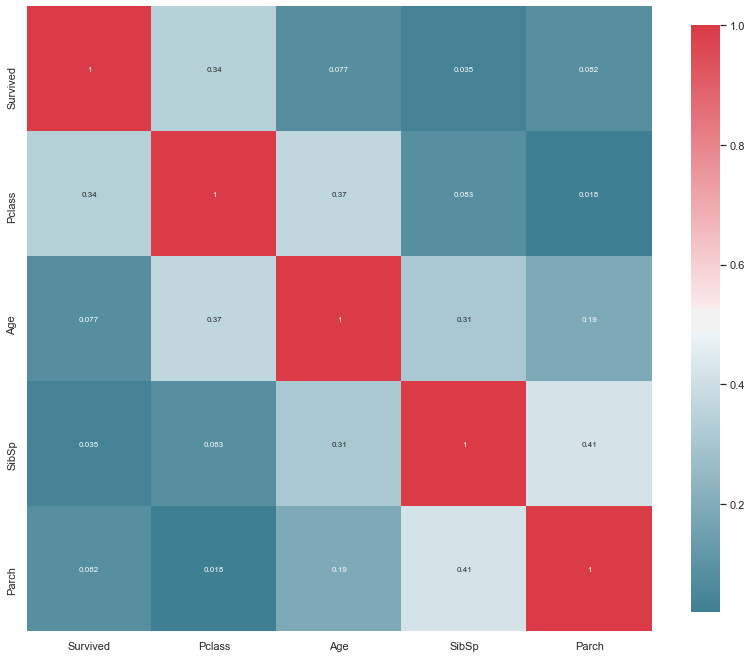

In [11]:
plot_correlation_map(data)

Вот такие признаки остались после прореживания


In [12]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


Посмотрим какой тип переменных у наших колонок

In [13]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Cabin        object
Embarked     object
dtype: object

Определим кол-во пропусков в нашем dataset

In [14]:
data.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Cabin        True
Embarked     True
dtype: bool

В нашем dataset есть колонка с названием "Cabin", имеющая огромное число пропусков и, ставящая в соответсвие каждому пассажиру уникальное значение. Для решения задачи бинарной классификации она нам не понадобится

In [15]:
data = data.drop(['Cabin'], axis='columns')

Посокольку столбцы "SibSp" и "Parch" определяют кол-во родственников на борту для каждого пассажира, то они могут быть объединены по этому признаку. Создадим новый столбец "Member_Family" 

In [16]:
data['Member_Family']=data['Parch']+data['SibSp']
data['Member_Family']=np.where(data['Member_Family']>0,1,0)
data = data.drop(['Parch','SibSp'], axis='columns')
data.dtypes

Survived           int64
Pclass             int64
Sex               object
Age              float64
Embarked          object
Member_Family      int32
dtype: object

В свете последних мировых тенденций, следует уточнить кол-во уникальных значений для столбца "Sex"

In [17]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

Столбец "Sex" содержит всего два значения "male" и "female". Эти значения могут быть преобразованы в классы "1" и "0" соответственно формата int64

In [18]:
data['Sex']=np.where(data['Sex']=='male',0,data['Sex'])
data['Sex']=np.where(data['Sex']=='female',1,data['Sex'])
data['Sex']=data['Sex'].astype(np.int64)

Теперь разберемся со столбцом "Age". Заполним недостающие данные медианными значениями и преобразуем к типу int64

In [19]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Age']=data['Age'].round(0)
data['Age']=data['Age'].astype(np.int64)

Определим кол-во уникальных классов для столбца "Embarked"

In [20]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Как мы можем увидеть, их всего 4: S - Southampton, C - Chebourg, Q - Queenstown. заполним недостающие фрагменты модальным значением и разобьем их на классы

In [21]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
data['S']=np.where(data['Embarked']=='S',1,0)
data['C']=np.where(data['Embarked']=='C',1,0)
data['Q']=np.where(data['Embarked']=='Q',1,0)
data=data.drop(['Embarked'],axis='columns')

Проверим наши данный после введнных корректировок

In [22]:
data.dtypes

Survived         int64
Pclass           int64
Sex              int64
Age              int64
Member_Family    int32
S                int32
C                int32
Q                int32
dtype: object

In [23]:
data.isna().any()

Survived         False
Pclass           False
Sex              False
Age              False
Member_Family    False
S                False
C                False
Q                False
dtype: bool

In [24]:
correlations_data = data.corr()['Survived'].sort_values()
print(correlations_data)

Pclass          -0.338481
S               -0.149683
Age             -0.064577
Q                0.003650
C                0.168240
Member_Family    0.203367
Sex              0.543351
Survived         1.000000
Name: Survived, dtype: float64


Удалим столбцы "S,Q,C" ввиду его малой корреляции с целевой функцией

In [25]:
data = data.drop(['S'], axis='columns')
data = data.drop(['C'], axis='columns')
data = data.drop(['Q'], axis='columns')

Теперь Machine Learning


Выделим в нашей выборке целевую переменную, а также разделим ее на тренировочную и тестовую. Цель построения модели - классифицировать новые данные. По умолчанию,train_test_split откладывает 25% выборок в исходном наборе данных для тестирования.

In [26]:
X = data[data.columns[1:]]
y = data['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25)

In [27]:
#количество элементов в выборках
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(668, 4)
(668,)
(223, 4)
(223,)


Будем проводить классификацию сначала с помощью метода ближайших соседей.

In [28]:
# импортируем класс классификатора по ближайшим соседям
from sklearn.neighbors import KNeighborsClassifier
# создадим наш классификатор. Гиперпараметр у этого алгоритма один - количество соседей.
clf = KNeighborsClassifier(n_neighbors=5)
# обучим классификатор на тренировочной выборке
clf.fit(X_train, y_train)
# подсчитаем долю верных ответов алгоритма на тестовой выборке.
clf.score(X_test, y_test)

0.7713004484304933

In [29]:
print(X_test)

     Pclass  Sex  Age  Member_Family
704       3    0   26              1
405       2    0   34              1
352       3    0   15              1
178       2    0   30              0
617       3    1   26              1
..      ...  ...  ...            ...
869       3    0    4              1
618       2    1    4              1
557       1    0   28              0
137       1    0   37              1
668       3    0   43              0

[223 rows x 4 columns]


In [30]:
print(y_test)

704    0
405    0
352    0
178    0
617    0
      ..
869    1
618    1
557    0
137    0
668    0
Name: Survived, Length: 223, dtype: int64


In [31]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0
 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0
 0]


Посмотрим, как влияет гиперпараметр на качество классификации.

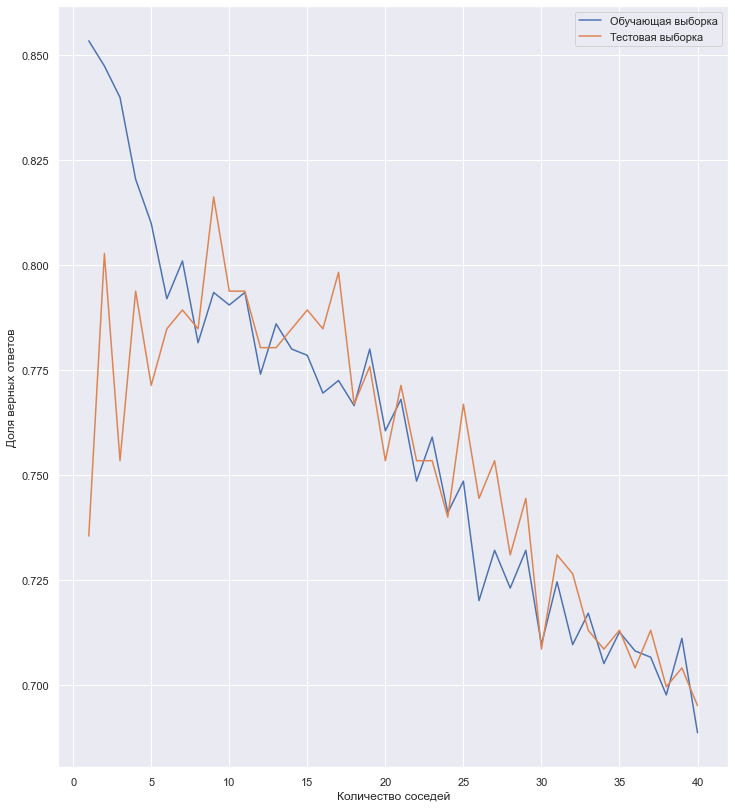

In [32]:
# Создадим пустой словарь. Будем добавлять в него значения наших "скоров". Ключами будет значение гиперпараметра,
# значениями - качество работы. Рассмотрим отдельно качество на тренировочной выборке и на тестовой.
train_scores = {}
test_scores = {}

# для n в диапазоне от 1 до 40 включительно
for n in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    # значение качества на текущей итерации:
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    # запишем его в наши словари
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score

# нарисуем графики

plt.plot(list(train_scores.keys()), list(train_scores.values()), label='Обучающая выборка')
plt.plot(list(test_scores.keys()), list(test_scores.values()), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

В соответствии с графиком, лучше всего брать гиперпараметр = 8.